# Exercise 1

***

### Use numpy and matplotlib to plot the absolute value function.

### Research and explain why the absolute value function is not typically used in fitting straight lines to data.

<br>

***

## Imports

In [1]:
# Efficient numerical arrays.
import numpy as np

# Import matplotlib.
import matplotlib.pyplot as plt

# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)

# Nicer colours and styles for plots.
plt.style.use("ggplot")

First we need to create a set of numbers w (weights in this case) from 0 to 20 using `np.arange`. We'll then use `numpy.random.normal` to create random points on the y-axis to represent distance. 

In [2]:
w = np.arange(0.0, 21.0, 1.0)
d = 5.0 * w + 10.0 + np.random.normal(0.0, 5.0, w.size)

Let's see how this looks on a plot.

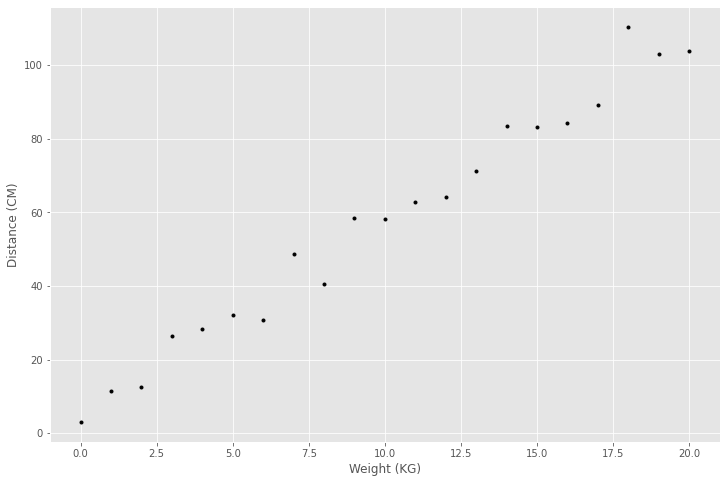

In [3]:
# Create the plot.

plt.plot(w, d, 'k.')

# Set some properties for the plot.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()

To fit a straight line to the data, we just must pick values for *m* and *c*. <br>
For the green line *m* is 5 and *c* is 10. <br>
For the green line *m* is 6 and *c* is 5. <br>
For the green line *m* is 10 and *c* is 15. <br>

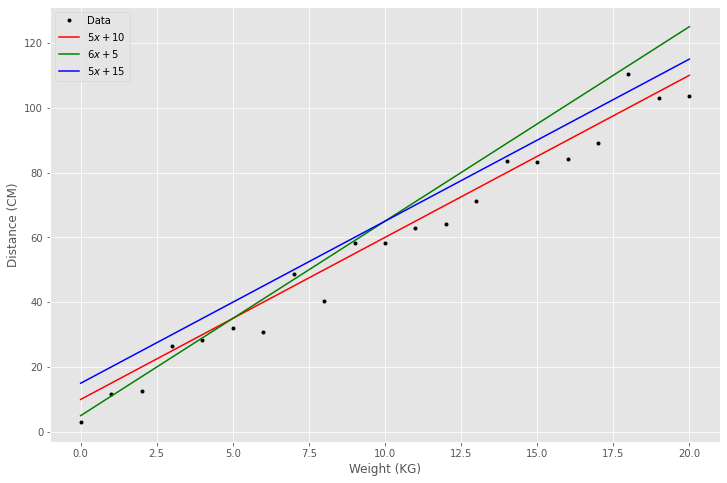

In [4]:
# Plot w versus d with black dots.
plt.plot(w, d, 'k.', label="Data")

# Overlay some lines on the plot.
x = np.arange(0.0, 21.0, 1.0)
plt.plot(x, 5.0 * x + 10.0, 'r-', label=r"$5x + 10$")
plt.plot(x, 6.0 * x +  5.0, 'g-', label=r"$6x +  5$")
plt.plot(x, 5.0 * x + 15.0, 'b-', label=r"$5x + 15$")

# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()

To calculate the absolute value insread of using *least square fitting*, we can use the code below which uses `numpy.absolute`. [01]

In [5]:
# Calculate the cost of the lines above for the data above.
cost = lambda m,c: np.sum([np.absolute(d[i] - m * w[i] - c) for i in range(w.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 10.0, cost(5.0, 10.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (6.0,  5.0, cost(6.0,  5.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 15.0, cost(5.0, 15.0)))

Cost with m =  5.00 and c = 10.00:    99.23
Cost with m =  6.00 and c =  5.00:   170.83
Cost with m =  5.00 and c = 15.00:   170.43


We now need to calculate the best values for *m* and *c*. The theory of this was discussed in the lecture. [02]

In [6]:
# Calculate the best values for m and c.

# First calculate the means (a.k.a. averages) of w and d.
w_avg = np.mean(w)
d_avg = np.mean(d)

# Subtract means from w and d.
w_zero = w - w_avg
d_zero = d - d_avg

# The best m is found by the following calculation.
m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
# Use m from above to calculate the best c.
c = d_avg - m * w_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 5.155909 and c is 5.840553.


In [7]:
np.polyfit(w, d, 1)

array([5.15590854, 5.84055297])

## Best fit line

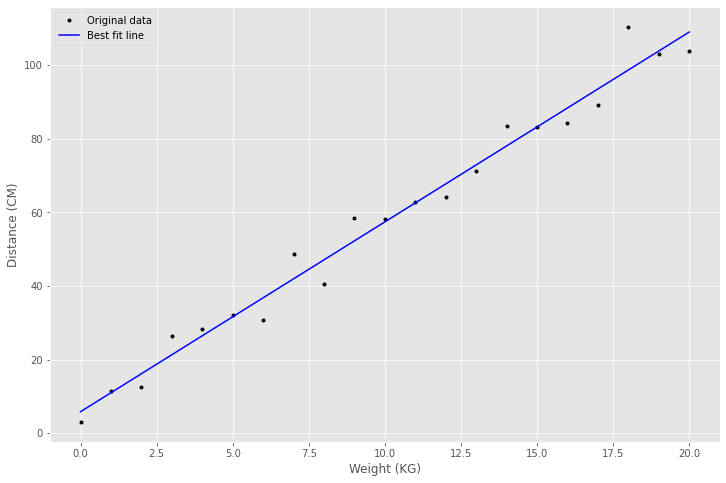

In [8]:
# Plot the best fit line.
plt.plot(w, d, 'k.', label='Original data')
plt.plot(w, m * w + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')
plt.legend()

# Show the plot.
plt.show()

In reality,'least absolute value methods' of regression is sometimes used instead of 'least squares', but there are a few reasons why least squares is more popular. [03]
1.  In calculus, when trying to solve an optimization problem (which is what regression is, minimizing error) we must take the derivative to find the points where it is equal to 0. When differentiating, absolute value signs are create a piecewise function whereas squares are far simpler to differentiate, especially due to their non-linearity. [03]
2. Least squares regression lines are more efficient (they don't require as great of a number of samples to get a good estimate of the true regression line for the population). [03]

Least squares is more common but only becuase it ended up that way. There are many good arguments as to why in many scenarios least absolute values are better, including the fact that least squares regression is far more sensitive to outliers. [03]

![popup1](img/popup_1.png)

![popup2](img/popup_2.png)

![popup3](img/popup_3.png)

The above compares the least-squares fit method and the least absolute deviations fit method. A straight line is fitted to a set of data points. In the case of the least-squares fit, the straight line is obtained by minimizing the sum of the squares of the residuals, which are the deviations of the data points from the line. In the case of the least absolute deviations fit, the straight line is obtained by minimizing the sum of the absolute values of the residuals. The least absolute deviations fit is a robust fit method, unlike the least-squares fit. [04] <br>
The least absolute deviations fit is a robust fit method. That means the least absolute deviations fit is insensitive to outlying data points. The robustness of the least absolute deviations fit is shown in Snapshot 1, where the top-left point is an outlier. [04]

***

## References

***

[01][NumPy - numpy.absolute](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html)<br>
[02][GitHub - Ian McLoughlin - 02-models.ipynb](https://github.com/ianmcloughlin/2223-S1-machine-learn-stats/blob/main/notebooks/02-models.ipynb)<br>
[03][math.stackexchange.com - Why does regression use least "squares" instead of least "absolute values"?](https://math.stackexchange.com/questions/3580109/why-does-regression-use-least-squares-instead-of-least-absolute-values)<br>
[04][demonstrations.wolfram.com -Comparing Least-Squares Fit and Least Absolute Deviations Fit](https://demonstrations.wolfram.com/ComparingLeastSquaresFitAndLeastAbsoluteDeviationsFit/)<br>
